In [19]:
import requests
import time
import json
import os
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from dotenv import load_dotenv

In [2]:
load_dotenv()
API_KEY = os.getenv("API_KEY")

In [3]:
STOCKS = ["AAPL", "MSFT", "TSLA", "GOOGL", "AMZN"]
BASE_URL = "https://www.alphavantage.co/query"

In [4]:
def get_alpha_vantage_data(api_key, function, symbol, params={}):
    """
    Fetches data from the Alpha Vantage API based on the given function and stock symbol.

    Parameters:
        api_key (str): Your Alpha Vantage API key.
        function (str): Alpha Vantage function (e.g., "TIME_SERIES_DAILY", "TIME_SERIES_INTRADAY").
        symbol (str): Stock symbol (e.g., "AAPL").
        params (dict): Additional API parameters (e.g., {"interval": "5min", "outputsize": "compact"}).

    Returns:
        dict: API response as a dictionary.
    """
    # Base URL for Alpha Vantage
    base_url = "https://www.alphavantage.co/query"
    
    # Construct API request parameters
    request_params = {"function": function, "symbol": symbol, "apikey": api_key}
    request_params.update(params)  # Add additional parameters if provided
    
    # Send API request
    response = requests.get(base_url, params=request_params)
    
    # Parse response as JSON
    data = response.json()

    return data

# Example Usage:
function = "TIME_SERIES_DAILY"  # Change to "TIME_SERIES_INTRADAY" or other functions

# Additional parameters (optional)
extra_params = {"outputsize": "full"}  # Use "full" for more data

# Fetch data
stock_data = get_alpha_vantage_data(API_KEY, function, STOCKS[0], extra_params)

In [5]:
stock_data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [6]:

if stock_data and "Time Series (Daily)" in stock_data.keys():
    print("API response is valid.")
else:
    print("Error: Invalid API response.")
    

API response is valid.


In [7]:
stock_data = stock_data['Time Series (Daily)']

In [16]:
df = pd.DataFrame.from_dict(stock_data, orient="index")

# Convert index to datetime and sort
df.index = pd.to_datetime(df.index)

# Current date (March 21, 2025)
current_date = datetime.now()

# Create start date by subtracting 2 years, keeping month and day
start_date = current_date.replace(year=current_date.year - 2)

# Format as string for DataFrame filtering
start_date_str = start_date.strftime("%Y-%m-%d")

# Filter the DataFrame
df = df[df.index >= start_date_str]

df = df.sort_index()

# Rename columns for better readability
df.columns = ["Open", "High", "Low", "Close", "Volume"]

df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Volume'] = df['Volume'].astype(int)

df.head()

,Open,High,Low,Close,Volume
2023-03-21,157.32,159.4000,156.54,159.28,73938285
2023-03-22,159.30,162.1400,157.81,157.83,75701811
2023-03-23,158.83,161.5501,157.68,158.93,67622060
2023-03-24,158.86,160.3400,157.85,160.25,59256343
2023-03-27,159.94,160.7700,157.87,158.28,52390266


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-03-21 to 2025-03-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    502 non-null    float64
 1   High    502 non-null    float64
 2   Low     502 non-null    float64
 3   Close   502 non-null    float64
 4   Volume  502 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 21.6 KB


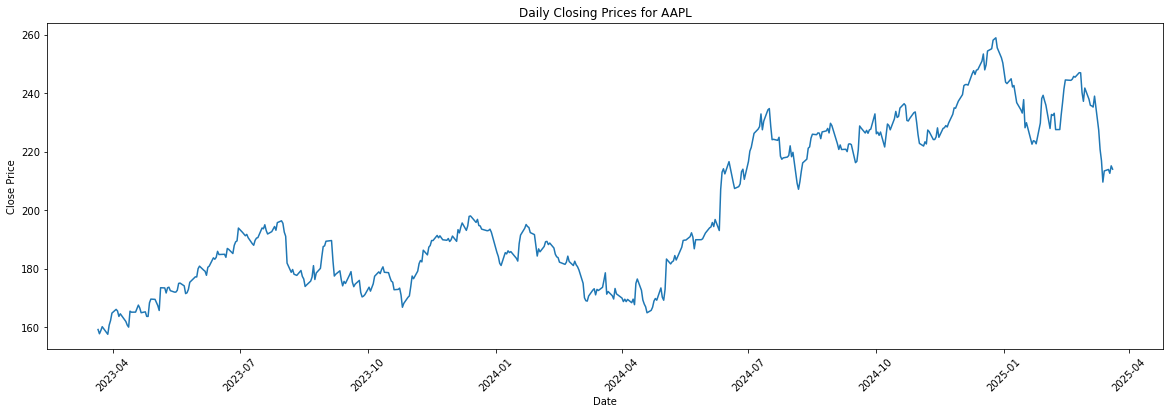

In [10]:
plt.figure(figsize=(20, 6)) 
sns.lineplot(data=df, x=df.index, y="Close")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title(f"Daily Closing Prices for {STOCKS[0]}")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [12]:
# Save to CSV
filename = f"{STOCKS[0]}_stock_data.csv"
df.to_csv(filename)
print(f"Data saved to {filename}")

Data saved to AAPL_stock_data.csv


In [15]:
# Create a line plot
fig = px.line(df, 
              x=df.index, 
              y='Close', 
              title='Data Over the Last 2 Years',
              labels={'Close': 'Value', 'index': 'Date'})

# Show the plot
fig.show()

In [ ]:
# Create the candlestick figure
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])

# Customize the layout
fig.update_layout(
    title='Candlestick Chart (Last 2 Years)',
    yaxis_title='Price',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False
)

# Show the plot
fig.show()